In [1]:
import pandas as pd
from sodapy import Socrata
from config import CHI_API_KEY
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofchicago.org", app_token = CHI_API_KEY)
# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofchicago.org,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")
# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("85ca-t3if", limit= 10000)
# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [2]:
results_df

,crash_record_id,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,...,longitude,location,private_property_i,intersection_related_i,crash_date_est_i,statements_taken_i,photos_taken_i,dooring_i,workers_present_i,rd_no
0,d3387b9674bddcc6d45b1974988a7271f395f4d1a7ee9b...,2020-11-11T23:44:00.000,40,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,...,-87.617547918,"{'type': 'Point', 'coordinates': [-87.61754791...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,62e132794469f38d98deb91281fb48dca8488577f0e838...,2020-11-11T23:30:00.000,15,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,ALLEY,STRAIGHT AND LEVEL,...,-87.755835594,"{'type': 'Point', 'coordinates': [-87.75583559...",Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1ea406919707febb6e40ad50a93079c33db2c6e4c900db...,2020-11-11T23:15:00.000,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,ONE-WAY,STRAIGHT AND LEVEL,...,-87.688179962,"{'type': 'Point', 'coordinates': [-87.68817996...",NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN
3,78f2be98e63abe30daaaff73f64ac20a33e9ee2515bc15...,2020-11-11T20:27:00.000,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,...,-87.723217631,"{'type': 'Point', 'coordinates': [-87.72321763...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5e204714ee33b3438e96fbbceff18dc20306bf4446c171...,2020-11-11T20:15:00.000,20,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,...,-87.650651942,"{'type': 'Point', 'coordinates': [-87.65065194...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,c0db5701530dc79d12f9c108aea45378ea81616364fb33...,2020-10-03T10:59:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,...,-87.643273213,"{'type': 'Point', 'coordinates': [-87.64327321...",NaN,Y,NaN,NaN,NaN,NaN,NaN,JD387241
9996,4ac804585987ff1baee617c3b1f2a873ff63547f31446f...,2020-10-03T10:45:00.000,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,...,-87.634336631,"{'type': 'Point', 'coordinates': [-87.63433663...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,JD387229
9997,0b5189397b79c75b076c652e20ebd0555efbc9c37792c0...,2020-10-03T10:44:00.000,30,NO CONTROLS,NO CONTROLS,CLOUDY/OVERCAST,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,...,-87.618493807,"{'type': 'Point', 'coordinates': [-87.61849380...",NaN,Y,NaN,NaN,NaN,NaN,NaN,JD387218
9998,47e3524af430fb5b20aa951789bbcb3007243045a6493a...,2020-10-03T10:40:00.000,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,-87.722730059,"{'type': 'Point', 'coordinates': [-87.72273005...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,JD387263


In [3]:
results_df.columns

Index(['crash_record_id', 'crash_date', 'posted_speed_limit',
       'traffic_control_device', 'device_condition', 'weather_condition',
       'lighting_condition', 'first_crash_type', 'trafficway_type',
       'alignment', 'roadway_surface_cond', 'road_defect', 'report_type',
       'crash_type', 'hit_and_run_i', 'damage', 'date_police_notified',
       'prim_contributory_cause', 'sec_contributory_cause', 'street_no',
       'street_direction', 'street_name', 'beat_of_occurrence', 'work_zone_i',
       'work_zone_type', 'num_units', 'most_severe_injury', 'injuries_total',
       'injuries_fatal', 'injuries_incapacitating',
       'injuries_non_incapacitating', 'injuries_reported_not_evident',
       'injuries_no_indication', 'injuries_unknown', 'crash_hour',
       'crash_day_of_week', 'crash_month', 'latitude', 'longitude', 'location',
       'private_property_i', 'intersection_related_i', 'crash_date_est_i',
       'statements_taken_i', 'photos_taken_i', 'dooring_i',
       'workers

In [4]:
# Create file with just id and lat/long

geo_df = pd.DataFrame(results_df[['crash_record_id', 'latitude','longitude']])
geo_df.head(10)

,crash_record_id,latitude,longitude
0,d3387b9674bddcc6d45b1974988a7271f395f4d1a7ee9b...,41.897581439,-87.617547918
1,62e132794469f38d98deb91281fb48dca8488577f0e838...,41.917027912,-87.755835594
2,1ea406919707febb6e40ad50a93079c33db2c6e4c900db...,41.992409199,-87.688179962
3,78f2be98e63abe30daaaff73f64ac20a33e9ee2515bc15...,41.876023941,-87.723217631
4,5e204714ee33b3438e96fbbceff18dc20306bf4446c171...,41.76621645,-87.650651942
5,fbb9c7c8081d11654352b96aa794baa28765e0f3ec5db9...,41.909564687,-87.759350676
6,31c12b4f4cab1967eaf2eb3d42eb2b9828336a41bd1ef1...,41.898666031,-87.757065785
7,f81e1673624fed6b9bb75afe4e0a00df12cb2512db14b6...,41.794642669,-87.63177187
8,0edb4e851a4903f79d6954a2c4f75c43acf846d4a49e1a...,NaN,NaN
9,64b6028a3a67c775e863e75f7c184123237624347a4cb1...,41.750547539,-87.643049643


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()

In [6]:
# Drop null coordinates
geo_df.dropna(axis=0,how='any',subset=['latitude','longitude'],inplace=True)

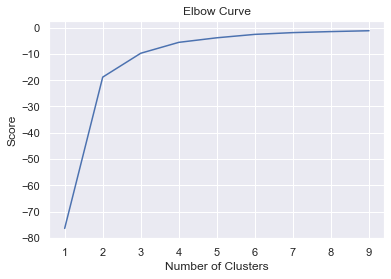

In [7]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = geo_df[['latitude']]
X_axis = geo_df[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [8]:
# Variable with the Longitude and Latitude
X=geo_df.loc[:,['crash_record_id','latitude','longitude']]
X.head(10)

,crash_record_id,latitude,longitude
0,d3387b9674bddcc6d45b1974988a7271f395f4d1a7ee9b...,41.897581439,-87.617547918
1,62e132794469f38d98deb91281fb48dca8488577f0e838...,41.917027912,-87.755835594
2,1ea406919707febb6e40ad50a93079c33db2c6e4c900db...,41.992409199,-87.688179962
3,78f2be98e63abe30daaaff73f64ac20a33e9ee2515bc15...,41.876023941,-87.723217631
4,5e204714ee33b3438e96fbbceff18dc20306bf4446c171...,41.76621645,-87.650651942
5,fbb9c7c8081d11654352b96aa794baa28765e0f3ec5db9...,41.909564687,-87.759350676
6,31c12b4f4cab1967eaf2eb3d42eb2b9828336a41bd1ef1...,41.898666031,-87.757065785
7,f81e1673624fed6b9bb75afe4e0a00df12cb2512db14b6...,41.794642669,-87.63177187
9,64b6028a3a67c775e863e75f7c184123237624347a4cb1...,41.750547539,-87.643049643
10,577f750274332785cbc86aff40039400a86c5143ea383f...,41.894164283,-87.620144729


In [9]:
kmeans = KMeans(n_clusters = 6, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

,crash_record_id,latitude,longitude,cluster_label
0,d3387b9674bddcc6d45b1974988a7271f395f4d1a7ee9b...,41.897581439,-87.617547918,5
1,62e132794469f38d98deb91281fb48dca8488577f0e838...,41.917027912,-87.755835594,1
2,1ea406919707febb6e40ad50a93079c33db2c6e4c900db...,41.992409199,-87.688179962,3
3,78f2be98e63abe30daaaff73f64ac20a33e9ee2515bc15...,41.876023941,-87.723217631,2
4,5e204714ee33b3438e96fbbceff18dc20306bf4446c171...,41.76621645,-87.650651942,0
5,fbb9c7c8081d11654352b96aa794baa28765e0f3ec5db9...,41.909564687,-87.759350676,2
6,31c12b4f4cab1967eaf2eb3d42eb2b9828336a41bd1ef1...,41.898666031,-87.757065785,2
7,f81e1673624fed6b9bb75afe4e0a00df12cb2512db14b6...,41.794642669,-87.63177187,0
9,64b6028a3a67c775e863e75f7c184123237624347a4cb1...,41.750547539,-87.643049643,0
10,577f750274332785cbc86aff40039400a86c5143ea383f...,41.894164283,-87.620144729,5


In [74]:
#X.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='viridis')
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [10]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, time
from sklearn.cluster import DBSCAN
from sklearn import metrics
from geopy.distance import great_circle
from shapely.geometry import MultiPoint

In [11]:
# define the number of kilometers in one radian
kms_per_radian = 6371.0088

In [12]:
# represent points consistently as (lat, lon)
coords = pd.DataFrame(geo_df[['latitude', 'longitude']])
coords.rename(columns={'latitude': 'lat', 'longitude': 'lon'}, inplace=True)
coords

,lat,lon
0,41.897581439,-87.617547918
1,41.917027912,-87.755835594
2,41.992409199,-87.688179962
3,41.876023941,-87.723217631
4,41.76621645,-87.650651942
...,...,...
9995,41.721347368,-87.643273213
9996,41.841623542,-87.634336631
9997,41.816519481,-87.618493807
9998,41.881767147,-87.722730059


In [13]:
# Need to change object type to float type for the calculations
coords["lat"] = pd.to_numeric(coords["lat"], downcast="float")
coords["lon"] = pd.to_numeric(coords["lon"], downcast="float")
coords.dtypes

lat    float32
lon    float32
dtype: object

In [14]:
# define epsilon as 1.5 kilometers, converted to radians for use by haversine
epsilon = 1.5 / kms_per_radian

In [15]:
start_time = time.time()
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_

# get the number of clusters
num_clusters = len(set(cluster_labels))

# all done, print the outcome
message = 'Clustered {:,} points down to {:,} clusters, for {:.1f}% compression in {:,.2f} seconds'
print(message.format(len(geo_df), num_clusters, 100*(1 - float(num_clusters) / len(geo_df)), time.time()-start_time))
print('Silhouette coefficient: {:0.03f}'.format(metrics.silhouette_score(coords, cluster_labels)))

Clustered 9,948 points down to 4 clusters, for 100.0% compression in 1.10 seconds
Silhouette coefficient: 0.429


In [16]:
coords.dtypes

lat    float32
lon    float32
dtype: object

In [18]:
# turn the clusters in to a pandas series, where each element is a cluster of points
clusters = pd.Series([coords[cluster_labels==n] for n in range(num_clusters)])
clusters.dtypes
clusters

0                lat        lon
0     41.897583 -87...
1                lat        lon
223   41.953766 -87...
2                lat        lon
2078  41.995075 -87...
3              lat        lon
2470  41.9762 -87.905...
dtype: object

In [19]:
print(num_clusters)

4


In [20]:
def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)

centermost_points = clusters.apply(get_centermost_point)

In [24]:
# centroid = (MultiPoint(clusters[2]).centroid.x, MultiPoint(clusters[2]).centroid.y)
# centermost_point = min(clusters, key=lambda point: great_circle(point, centroid).m)

In [ ]:
# unzip the list of centermost points (lat, lon) tuples into separate lat and lon lists
lats, lons = zip(*centermost_points)

# from these lats/lons create a new df of one representative point for each cluster
rep_points = pd.DataFrame({'lon':lons, 'lat':lats})
rep_points.tail()

In [ ]:
# plot the final reduced set of coordinate points vs the original full set
fig, ax = plt.subplots(figsize=[10, 6])
rs_scatter = ax.scatter(rs['lon'], rs['lat'], c='#99cc99', edgecolor='None', alpha=0.7, s=120)
df_scatter = ax.scatter(geo_df['lon'], geo_df['lat'], c='k', alpha=0.9, s=3)
ax.set_title('Full data set vs DBSCAN reduced set')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend([geo_df_scatter, rs_scatter], ['Full set', 'Reduced set'], loc='upper right')
plt.show()